# **Author - Mohamed Ali**
## GRIP @ The Sparks Foundation
### Task-2 Prediction using Unsupervised Machine Learning, predict the optimum number of clusters and represent it visually.


Date : 12-05-2023

**Datasets used**
From the given ‘Iris’ dataset.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
X.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Data Visualization

<Axes: >

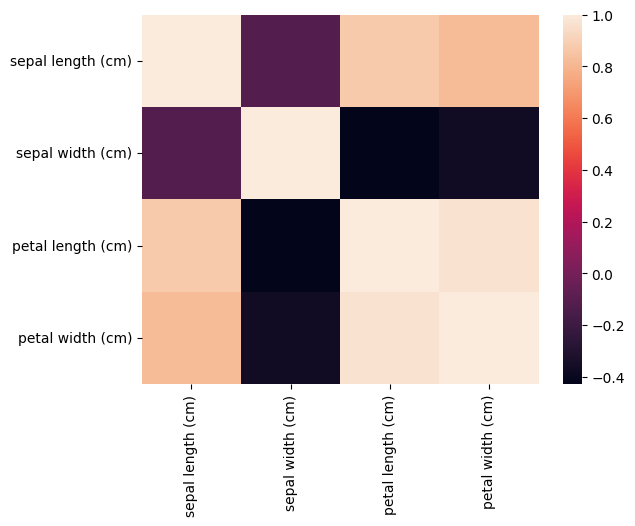

In [ ]:
sns.heatmap(X.corr())

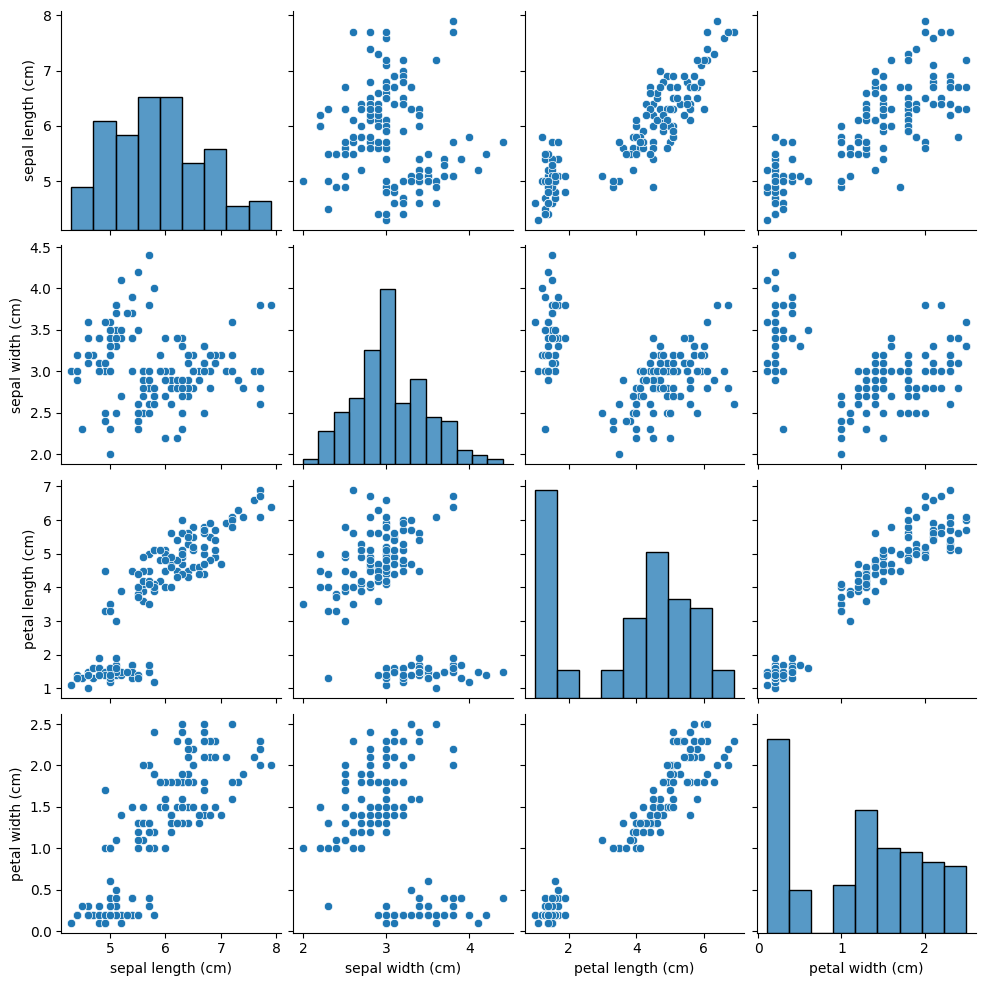

In [ ]:
sns.pairplot(X, diag_kind='hist')


#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

To find the optimum number of clusters for KMeans on the iris dataset, you can use the elbow method, which involves plotting the within-cluster sum of squares (WCSS) against the number of clusters. The WCSS is the sum of the squared distances between each data point and its assigned cluster center.

Text(0, 0.5, 'WCSS')

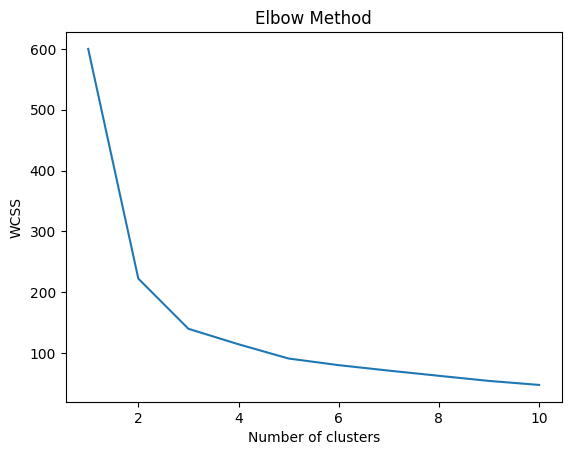

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize empty list to store WCSS values for each number of clusters
wcss = []

# Fit KMeans models for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is another name for WCSS

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


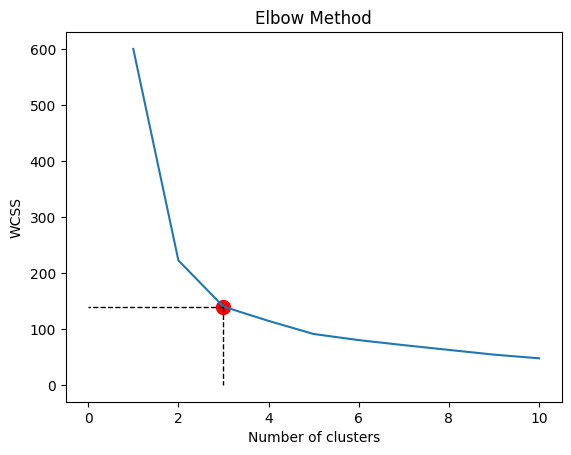

In [ ]:
# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Find the elbow point
x_elbow = 3
y_elbow = wcss[x_elbow-1]

# Highlight the elbow point in red
plt.scatter(x_elbow, y_elbow, s=100, c='red')

# Draw a line to connect the elbow point to the x and y axes
plt.plot([x_elbow, x_elbow], [y_elbow, 0], 'k--', lw=1)
plt.plot([x_elbow, 0], [y_elbow, y_elbow], 'k--', lw=1)

plt.show()

In the resulting plot, you should look for the "elbow point", which is the point of inflection where the decrease in WCSS begins to level off. This is considered to be a good indication of the optimum number of clusters. In this particular case, the elbow point appears to be at k=3, suggesting that three clusters may be the optimal number for the iris dataset.

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [ ]:
# Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

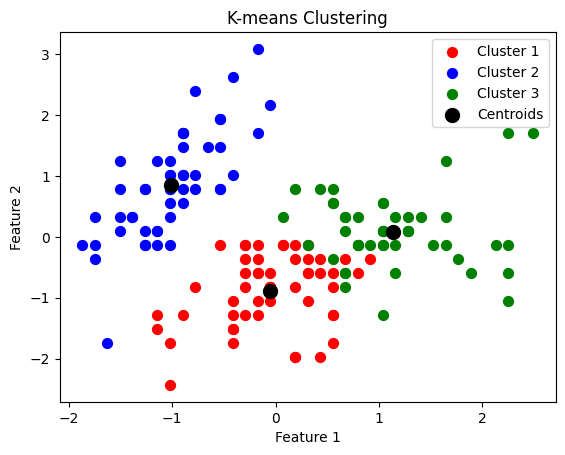

In [ ]:
# Visualize the clusters on the first two columns
plt.scatter(X_scaled[y_kmeans==0, 0], X_scaled[y_kmeans==0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans==1, 0], X_scaled[y_kmeans==1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans==2, 0], X_scaled[y_kmeans==2, 1], s=50, c='green', label='Cluster 3')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

This concludes the K-Means Workshop.

**Any questions?**